In [1]:
from barrier3d import Barrier3d
from cascade.outwasher import Outwasher
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")

for t in range(1, 64):
    b3d.update()
    b3d.update_dune_domain()
    print('B3D time step: ', t)

outwash = Outwasher(
            datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
            outwash_years="outwash_years.npy",
            outwash_bay_levels="outwash_bay_levels.npy",
#             outwash_bay_levels="full_outwash_hydrograph.npy",
            time_step_count=b3d._TMAX,
            berm_elev=b3d._BermEl,
            barrier_length=b3d._BarrierLength,
            sea_level=b3d._SL,
            bay_depth=-b3d._BayDepth,
            interior_domain=b3d.InteriorDomain,
            dune_domain=b3d.DuneDomain[b3d._time_index - 1],
            block_size = 5,
            substep=20,
            sediment_flux_coefficient_Cx=10,
            sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
            max_slope=-0.25)

outwash.update(b3d)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13


c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1359: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1360: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1361: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3D time step:  54
B3D time step:  55
B3D time step:  56
B3D time step:  57
B3D time step:  58
B3D time step:  59
B3D time step:  60
B3D time step:  61
B3D time step:  62
B3D time step:  63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [4]:
outwash._Qs_shoreface[b3d._time_index-1] # m^3

3969.7395872905936

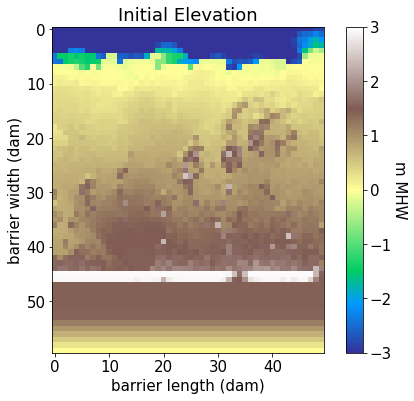

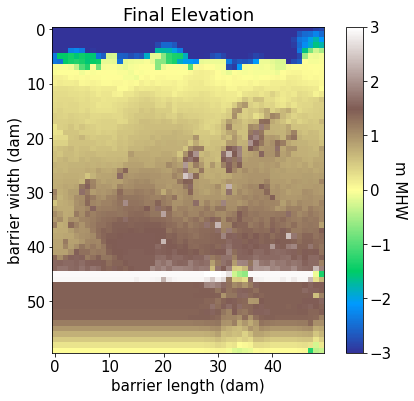

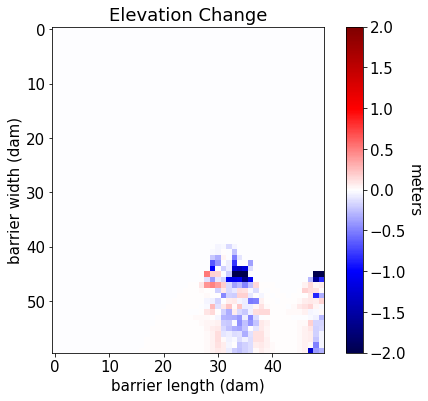

In [11]:
import os

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

path = "D:/NC State/Outwasher/Output/newest_flow_routing/"
runID = "Kie-3_substep20_B3D63_5x5"
newpath = path + runID + "/"
if not os.path.exists(newpath):
    os.makedirs(newpath)
os.chdir(newpath)

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')


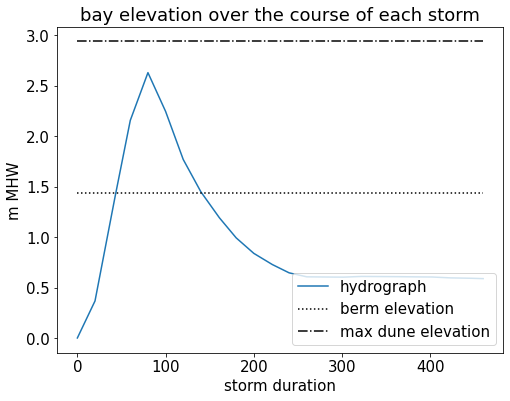

In [6]:
### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
# plt.rcParams['figure.figsize'] = (8,5)

bay_levels = outwash._final_bay_levels
duration = len(bay_levels)
x = range(0, duration)
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._full_dunes[0]) * np.ones(len(x))

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(x, bay_levels*10, label="hydrograph")
# if we have multiple storms, will only need to plot these once
ax5.plot(x, beach_elev_line*10, 'k', linestyle='dotted', label='berm elevation')
ax5.plot(x, dune_elev_line*10, 'k', linestyle='dashdot', label='max dune elevation')
ax5.set_xlabel("storm duration")
ax5.set_ylabel("m MHW")
ax5.set_title("bay elevation over the course of each storm")
ax5.legend(loc="lower right")
plt.show()
fig5.savefig(newpath + "hydrograph", facecolor='w')
plt.close()

In [7]:
from scripts.outwash_ms.plotters_outwash import (plot_ElevAnimation, plot_DischargeAnimation, plot_FRarray)

In [8]:
plt.rcParams.update({"font.size": 15})
start = outwash._OW_TS[0]
# stop = outwash._OW_TS[-1]
stop = start+200
# path = "D:/NC State/Outwasher/Output/full_hydro/"
# runID = "Kie-3_substep20_B3D63_extra_row_C0_10x10"
# newpath = path + runID + "/"
# plot_ElevAnimation(elev_change, newpath, start, stop)
plot_DischargeAnimation(outwash._discharge[b3d._time_index-1], newpath, start, stop)
plot_FRarray(outwash._flow_routing_cellular_array[b3d._time_index-1], newpath, start, stop)


[ * discharge GIF successfully generated * ]

[ * FR array GIF successfully generated * ]


In [9]:
b3d.x_s_TS[-1]  # dam

52.34630490991205

In [10]:
b3d.x_s_TS[-2]  # dam

52.46168222972467

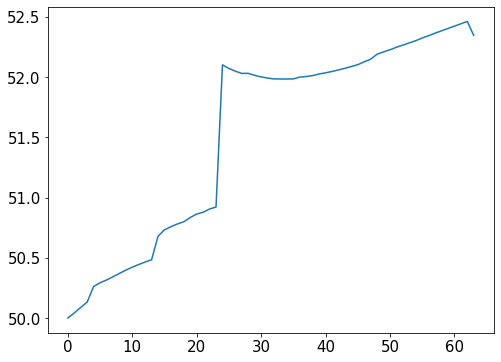

In [12]:
plt.plot(b3d.x_s_TS)